Linguagem Natural parte 1: NLP com análise de sentimento

In [1]:
#pip install wordcloud
#pip install nltk

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

%matplotlib inline

In [3]:
resenha = pd.read_csv("C:/Users/marco/alura/Machine Learning Avançada/NLP/pt1/imdb-reviews-pt-br.csv")

In [4]:
classificacao = resenha['sentiment'].replace(['neg','pos'], [0,1])
resenha['classificacao'] = classificacao

C:\Users\marco\AppData\Local\Temp\ipykernel_14064\4090155684.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao = resenha['sentiment'].replace(['neg','pos'], [0,1])


In [5]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [6]:
resenha

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [7]:
print('Negativa \n')
print(resenha.text_pt[190])

Negativa 

Como muitos dos comentários acima de mim, também eu pensei que este era o filme de scifi médio, mas infelizmente não era. Eu achei bastante paternalista e, na verdade, pregando. Mas esse não é o único comentário. As cenas são muito artificiais, não como em scifi, como explicarei em alguns momentos. A próxima frase é um pequeno spoiler. O filme representa mais ou menos uma discussão entre dois grupos. A configuração física de uma discussão normalmente envolve dois ou três homens próximos um do outro, o do meio falando tipicamente. No pior dos casos, a outra parte é representada por uma pessoa. Também as entrevistas que os repórteres têm são muito artificiais, às vezes até mesmo pouco profissionais. Por exemplo, por vezes, a discussão é entre os repórteres, quero dizer, a partir de um ponto do entrevistado, akward. Além disso, os entrevistados sempre ficam calmos, dizem tudo sem emoções normais. Ou seja você não pode dizer se eles mentem ou não, são loucos ou não. Eles mostram

In [8]:
print('Positiva \n')
print(resenha.text_pt[42000])

Positiva 

Foi assim que me senti ao assistir este filme. Eu amei. Foi hilário. Mas eu senti como se eu estivesse tendo uma visão sorrateira da psicologia de alguém e depois rindo, uma vez que foi distorcida para criar um ponto interessante. Um amigo coloca desta forma: "Eu sinto como se tivéssemos invadido a casa de alguém e agora estão assistindo seus terríveis vídeos caseiros sem o seu conhecimento". Outro desses fatos é mais estranho do que os filmes de ficção. "Groovin Gary", o original "Beaver Kid", é um cara de cidade pequena que aparece em uma estação de TV nas proximidades, na esperança de entrar no filme - e ele certamente o faz, embora talvez não, como inicialmente esperava. Com grandes esperanças de fama e significado, ele convida Harris para vir e filmar uma verdadeira missão de talentos que ele organizou em sua cidade natal - encabeçada por seu próprio ato de arrastar "Olivia Newton-Don". O diretor, Trent Harris, faz um trabalho brilhante com essa história de evolução len

In [9]:
#Avaliar se estão desbalanceados pos/neg.

In [10]:
print(resenha.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [11]:
#adicionado coluna para 0:neg e 1:pos

In [12]:
'''No próximo vídeo Bag of Words - um exemplo em Python, no minuto 9:00, usamos a função pandas.SparseDataFrame. Mas essa classe foi depreciada, portanto neste nosso exemplo devemos usar DataFrame.sparse.from_spmatrix. Abaixo segue a explicação de matriz esparsa e como utilizar o DataFrame.sparse.from_spmatrix.'''

'No próximo vídeo Bag of Words - um exemplo em Python, no minuto 9:00, usamos a função pandas.SparseDataFrame. Mas essa classe foi depreciada, portanto neste nosso exemplo devemos usar DataFrame.sparse.from_spmatrix. Abaixo segue a explicação de matriz esparsa e como utilizar o DataFrame.sparse.from_spmatrix.'

In [13]:
texto = ['assisti um filme bom', 'assisti um filme ruim']
vetorizar = CountVectorizer(lowercase=False)
#lowercase vem padrão True
bag_of_words = vetorizar.fit_transform(texto)

In [14]:
vetorizar.get_feature_names_out()

array(['assisti', 'bom', 'filme', 'ruim', 'um'], dtype=object)

In [15]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [16]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [17]:
matriz_esparsa

,assisti,bom,filme,ruim,um
0,1,1,1,0,1
1,1,0,1,1,1


In [18]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
#lowercase vem padrão True
bag_of_words = vetorizar.fit_transform(resenha.text_pt)

In [19]:
bag_of_words.shape

(49459, 50)

In [20]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, resenha.classificacao, random_state=42)

In [21]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.6583097452486858


In [22]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=42)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [23]:
print(classificar_texto(resenha,'text_pt', 'classificacao'))

0.6583097452486858


In [24]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

In [25]:
len(todas_palavras)

63448424

In [26]:
nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, background_color='whitesmoke',
                             collocations=False, colormap='coolwarm').generate(todas_palavras)

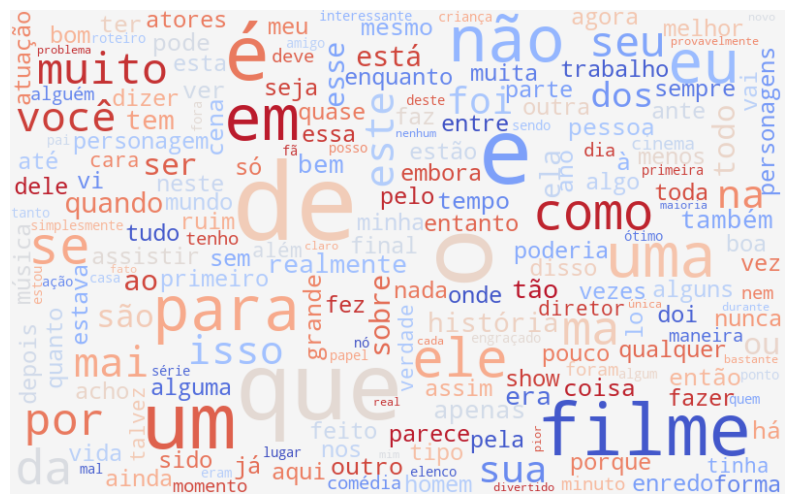

In [27]:
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_de_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
def nuvem_negativa(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    
    nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, background_color='whitesmoke',
                                 collocations=False, colormap='Reds').generate(todas_palavras)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_de_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nuvem Negativa')
    plt.show()

In [29]:
def nuvem_positiva(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    
    nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, background_color='whitesmoke',
                                 collocations=False, colormap='Blues').generate(todas_palavras)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_de_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nuvem Positiva')
    plt.show()

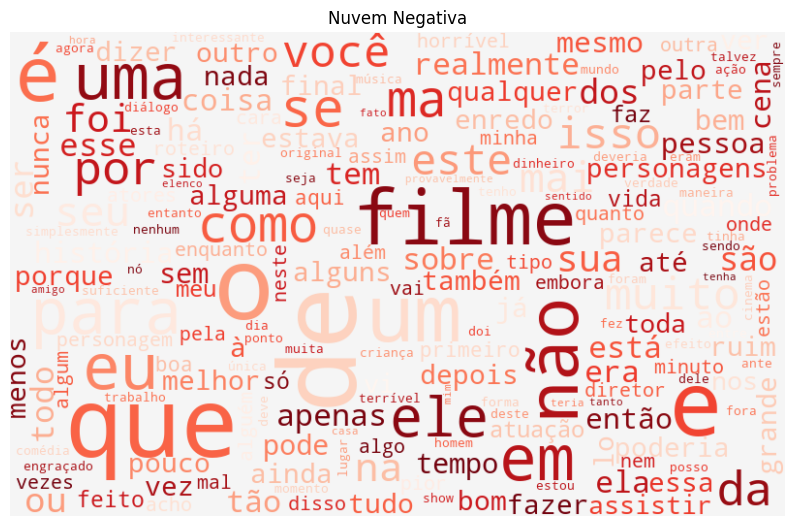

In [30]:
nuvem_negativa(resenha, 'text_pt')

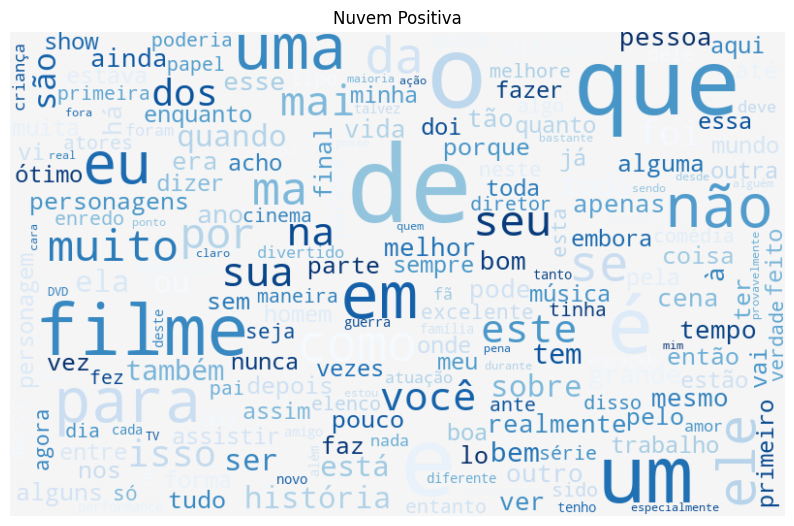

In [31]:
nuvem_positiva(resenha, 'text_pt')

In [32]:
#nltk.download('all')

In [33]:
frase = ['um filme ruim', 'um filme bom']
frequencia = nltk.FreqDist(frase)

In [34]:
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [35]:
from nltk import tokenize

In [36]:
frase2 = 'Eu sou a velocidade'

In [37]:
token_espaco = tokenize.WhitespaceTokenizer()
token_frase2 = token_espaco.tokenize(frase2)
token_frase2

['Eu', 'sou', 'a', 'velocidade']

In [38]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [39]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [40]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                             'Frequencia':list(frequencia.values())})

In [41]:
df_frequencia.nlargest(columns='Frequencia', n=20)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


[Text(0, 0.5, 'Contagem')]

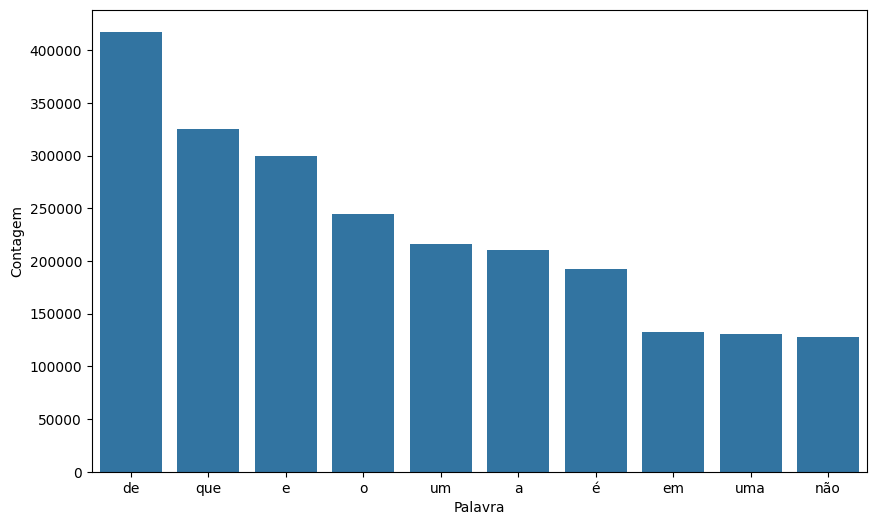

In [42]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequencia', n=10), x='Palavra', y='Frequencia')
ax.set(ylabel = 'Contagem')

In [43]:
def pareto(texto, coluna_texto, quantidade):
    
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)

    df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                             'Frequencia':list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns='Frequencia', n=quantidade)
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df_frequencia, x='Palavra', y='Frequencia')
    ax.set(ylabel = 'Contagem')
    plt.show()

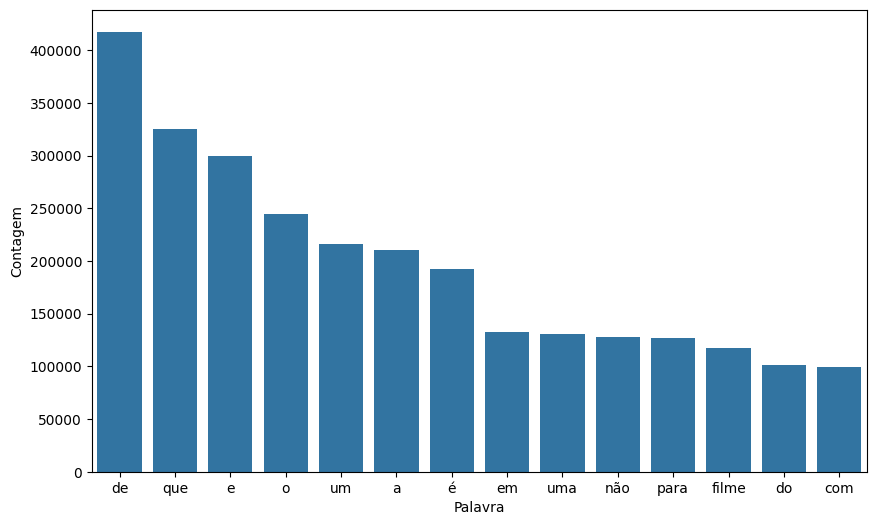

In [44]:
pareto(resenha, 'text_pt', 14)

In [45]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [46]:
print(palavras_irrelevantes)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [47]:
frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_1'] = frase_processada 

In [48]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [49]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.6810351799433886

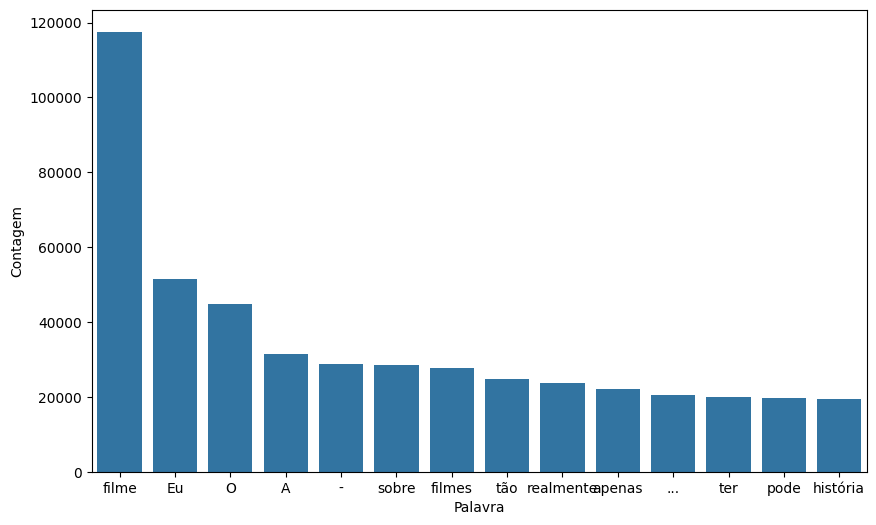

In [50]:
pareto(resenha, 'tratamento_1', 14)

Linguagem Natural parte 2: Continuando com a análise de sentimento

In [55]:
frase = 'Olá Mundo!'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Olá', 'Mundo', '!']


In [62]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes
#faria isso diferente... adicionaria pontuacao a palavras_irrelevantes

frase_processada = list()
for opiniao in resenha['tratamento_1']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
resenha['tratamento_2'] = frase_processada
    

In [63]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [64]:
resenha['tratamento_1'][14]

'Este filme absolutamente terrível horrível. Não orçamento baixo, filme orçamento faz filmes Ed Woods pareçam arte. A atuação péssima, sets adereços piores qualquer coisa vi. Um trem metrô comum usado transportar pessoas zona mal mutantes assassinos, Woddy Strode bala cenas luta disparadas poço cascalho desuso. Há sadismo esperaria vídeo italiano anos 80 desagradável. Nenhum talento usado fazer filme. E interesse amoroso sexo feminino enorme sabor bunda- italiano talvez. Mesmo padrões italianos anos 80, filme ruim, acho lançado momento havia tantos filmes disponíveis vídeo espectadores perspicazes. Este pedaço porcaria qualquer valor entretenimento sequer engraçado, apenas chato extremamente barato. É realmente insultar público estúpido. Eu pergunto terra ator Woody Strode acabou peru este?'

In [65]:
resenha['tratamento_2'][14]

'Este filme absolutamente terrível horrível Não orçamento baixo filme orçamento faz filmes Ed Woods pareçam arte A atuação péssima sets adereços piores qualquer coisa vi Um trem metrô comum usado transportar pessoas zona mal mutantes assassinos Woddy Strode bala cenas luta disparadas poço cascalho desuso Há sadismo esperaria vídeo italiano anos 80 desagradável Nenhum talento usado fazer filme E interesse amoroso sexo feminino enorme sabor bunda italiano talvez Mesmo padrões italianos anos 80 filme ruim acho lançado momento havia tantos filmes disponíveis vídeo espectadores perspicazes Este pedaço porcaria qualquer valor entretenimento sequer engraçado apenas chato extremamente barato É realmente insultar público estúpido Eu pergunto terra ator Woody Strode acabou peru'

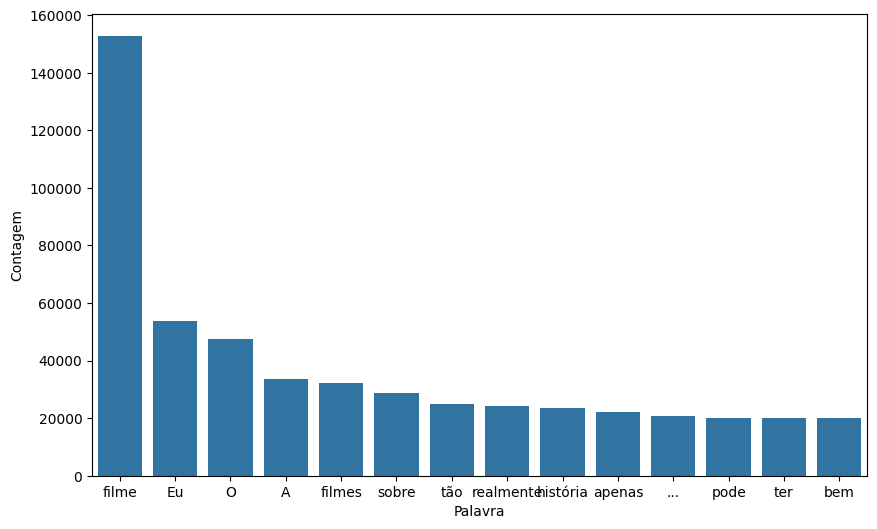

In [67]:
pareto(resenha, 'tratamento_2', 14)

In [72]:
import unidecode

acentos = 'ótimo péssimo não é tão'
teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [73]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

In [74]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [75]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [76]:
resenha['tratamento_3'] = sem_acentos

frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_3'] = frase_processada

In [77]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [78]:
acuracia_tratamento3 = classificar_texto(resenha, 'tratamento_3', 'classificacao')

In [80]:
print(round(acuracia_tratamento3,4))

0.6888


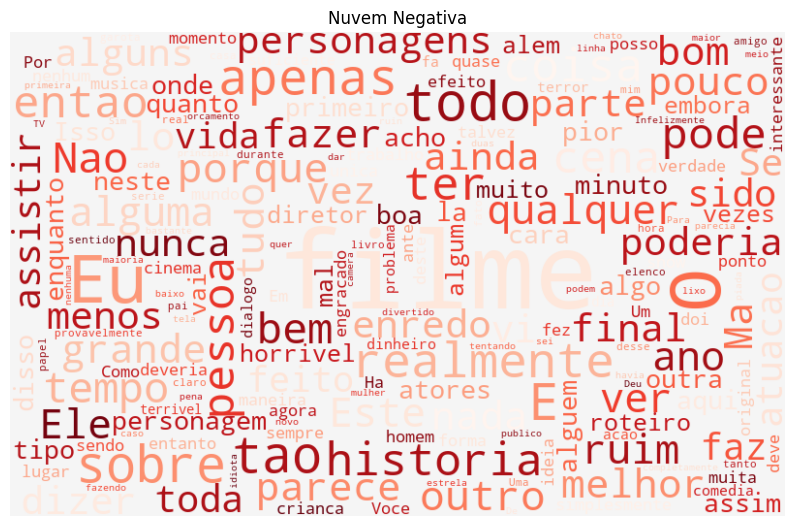

In [81]:
nuvem_negativa(resenha, 'tratamento_3')

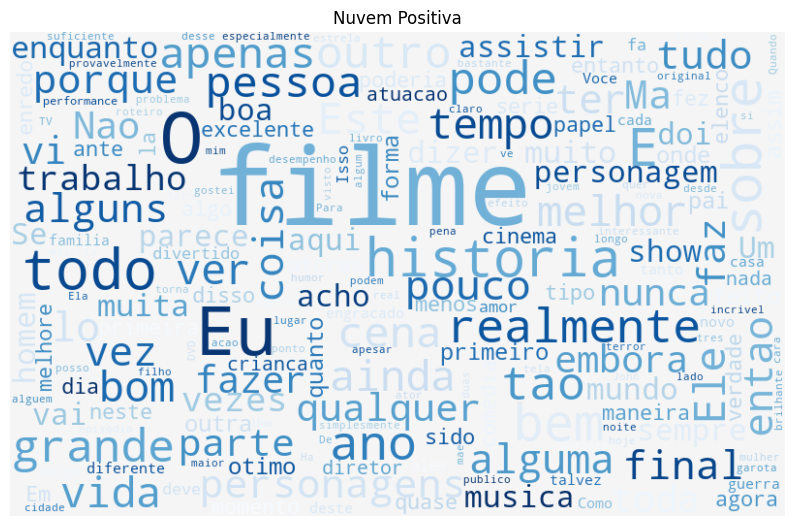

In [82]:
nuvem_positiva(resenha, 'tratamento_3')

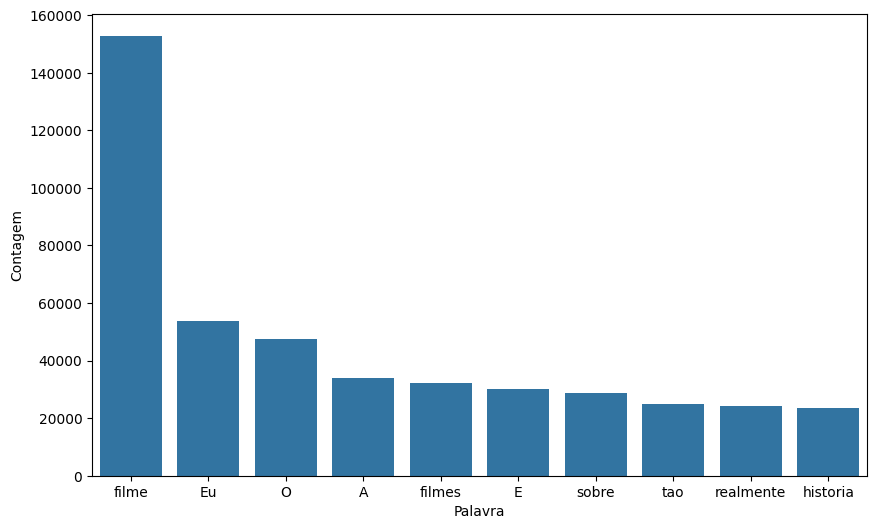

In [83]:
pareto(resenha, 'tratamento_3', 10)

In [84]:
frase = 'Eu sou a Velocidade'
print(frase.lower())

eu sou a velocidade


In [86]:
frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_4'] = frase_processada

In [91]:
#Matou umas palavras capitalizadas???
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


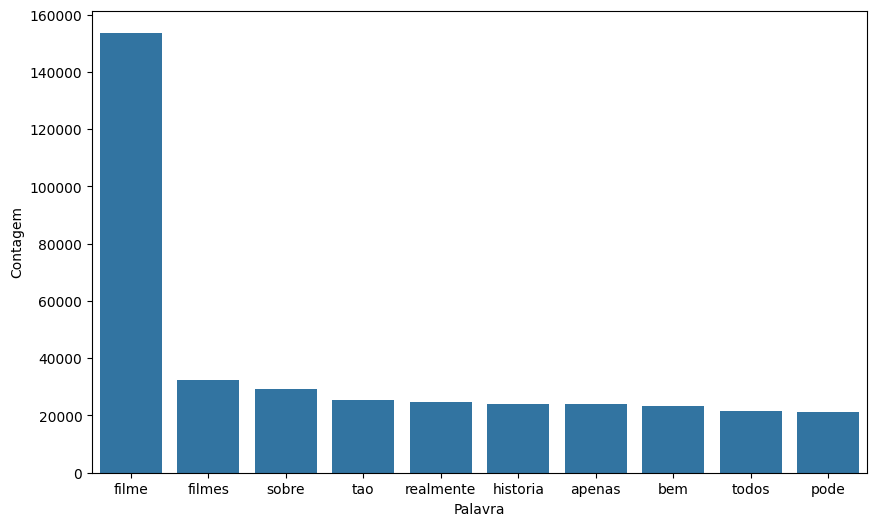

In [92]:
pareto(resenha, 'tratamento_4', 10)

In [112]:
acuracia_tratamento4 = classificar_texto(resenha, 'tratamento_4', 'classificacao')

In [113]:
acuracia_tratamento4

0.688071168621108

In [114]:
acuracia_tratamento3

0.6887990295188031

In [115]:
acuracia_tratamento4 == acuracia_tratamento3

False

In [100]:
#Instrutor fez errado, copiando e colando sem atenção. Não descapitalizou. Matou as captalizadas.

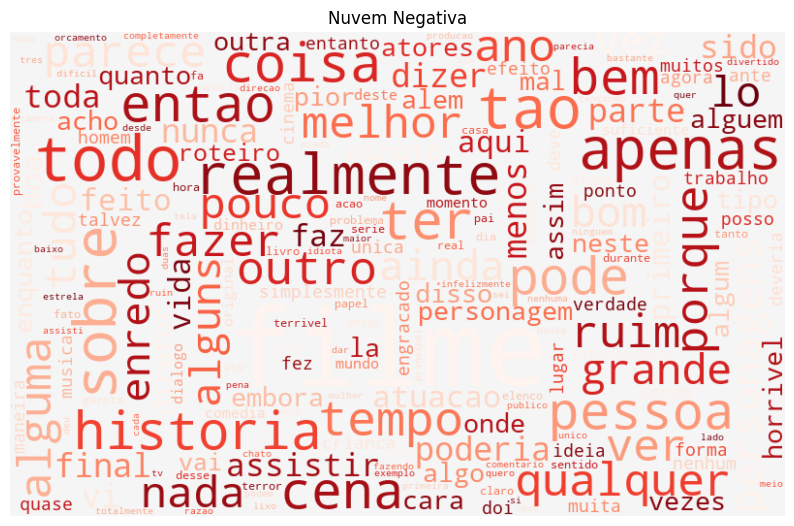

In [98]:
nuvem_negativa(resenha, 'tratamento_4')

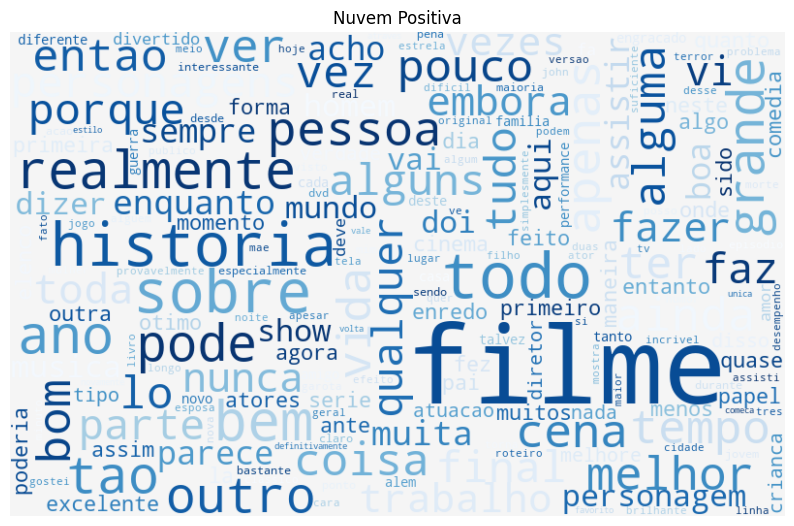

In [99]:
nuvem_positiva(resenha, 'tratamento_4')

In [103]:
#RSLP removedor de sufixo
#Porter para palavras em ingles

stemmer = nltk.RSLPStemmer()
stemmer.stem('corredor'),  stemmer.stem('correria'),  stemmer.stem('corrida') 

('corr', 'corr', 'corr')

In [105]:
frase_processada = list()
for opiniao in resenha['tratamento_4']:
    nova_frase = list()
    #opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_5'] = frase_processada

In [106]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...


In [107]:
acuracia_tratamento5 = classificar_texto(resenha, 'tratamento_5', 'classificacao')

In [117]:
round(acuracia_tratamento3, 5), round(acuracia_tratamento4, 5), round(acuracia_tratamento5, 5)

(0.6888, 0.68807, 0.69559)

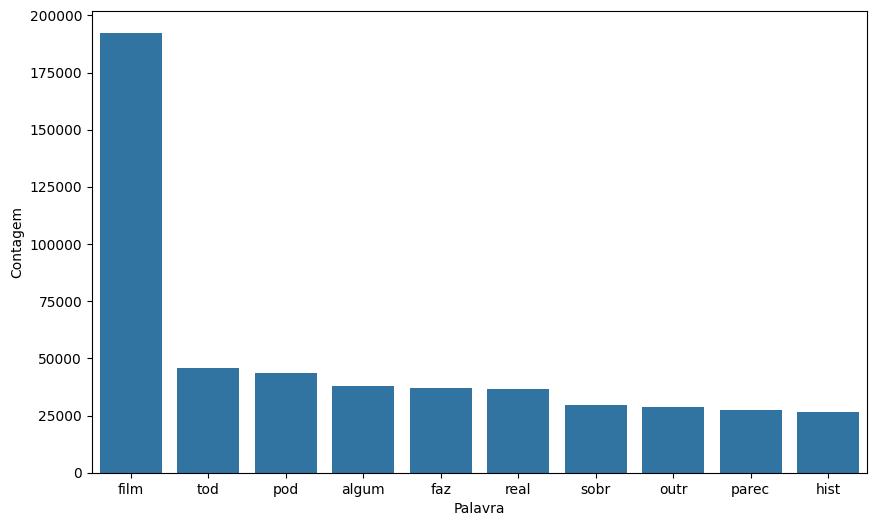

In [109]:
pareto(resenha, 'tratamento_5', 10)

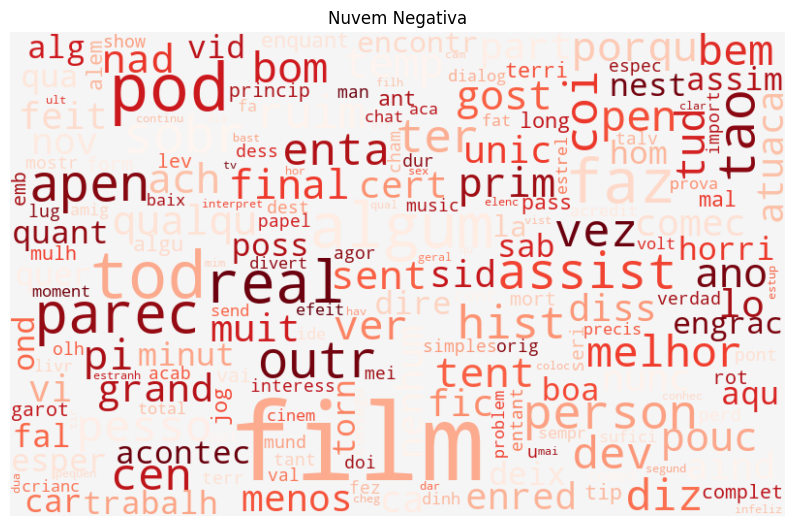

In [110]:
nuvem_negativa(resenha, 'tratamento_5')

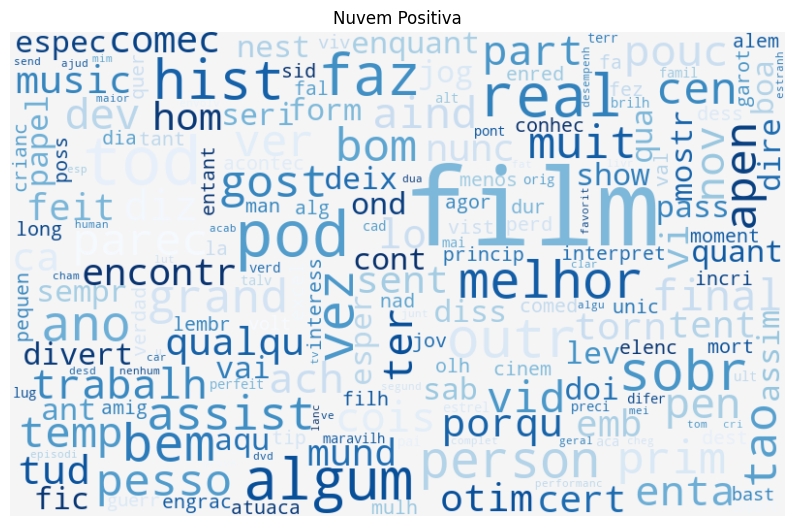

In [111]:
nuvem_positiva(resenha, 'tratamento_5')

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
frases = ['Assisti um filme ótimo', 'Assisti um filme péssimo']
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(caracteristicas.todense(), columns=tfidf.get_feature_names_out())

,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [120]:
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, resenha['classificacao'], random_state=42)

regressao_logistica.fit(treino, classe_treino)

acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)

print(acuracia_tfidf_bruto)


0.6604933279417712


In [121]:
tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, resenha['classificacao'], random_state=42)

regressao_logistica.fit(treino, classe_treino)

acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)

print(acuracia_tfidf_tratados)

0.6964820056611403


In [122]:
round(acuracia_tratamento3, 5), round(acuracia_tratamento4, 5), round(acuracia_tratamento5, 5), round(acuracia_tfidf_bruto, 5), round(acuracia_tfidf_tratados, 5)

(0.6888, 0.68807, 0.69559, 0.66049, 0.69648)

In [123]:
from nltk import ngrams

In [126]:
frase = 'Assisti um ótimo filme.'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [127]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor, resenha['classificacao'], random_state=42)

regressao_logistica.fit(treino, classe_treino)

acuracia_ngrams = regressao_logistica.score(teste, classe_teste)

print(acuracia_ngrams)


0.886696320258795


In [128]:
tfidf = TfidfVectorizer(lowercase=False) #tirando ngram_range
vetor = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor, resenha['classificacao'], random_state=42)

regressao_logistica.fit(treino, classe_treino)

acuracia_ngrams = regressao_logistica.score(teste, classe_teste)

print(acuracia_ngrams)


0.884270117266478


In [135]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T, index=tfidf.get_feature_names_out())

pesos.nlargest(20,0)

,0
otim,8.215092
excel,7.903823
perfeit,6.521988
favorit,5.768388
maravilh,5.241512
incri,4.934224
hilari,4.735206
divert,4.486934
ador,4.398724
brilh,4.228919


In [136]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T, index=tfidf.get_feature_names_out())

pesos.nsmallest(20,0)

,0
ruim,-9.174821
pi,-9.116361
horri,-8.681671
terri,-7.090521
chat,-6.844734
nad,-5.965650
infeliz,-5.276438
decepca,-5.128793
ridicul,-4.992068
decepcion,-4.984749
